In [55]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg
from scipy.integrate import odeint

Para hallar $\eta$ hacemos lo siguiente \
$$\ddot{\eta_1}+\eta_1ω_1 =0$$ \
$$\ddot{\eta_2}+\eta_2ω_2 =0$$ \
$$σ_1=\dot{\eta_1} \ \ \ , \ \ \dot{σ_1}+\eta_1ω_1 =0 \ \ \ \ \ \ (1)$$ \
$$σ_2=\dot{\eta_2} \ \ \ , \ \ \dot{σ_2}+\eta_2ω_2 =0 \ \ \ \ \ (2)$$ \
$$\begin{bmatrix}
 \frac{d\eta}{dt}\\\frac{d\sigma}{dt}
\end{bmatrix}
=\begin{bmatrix}
 \sigma\\\\-\etaω
\end{bmatrix} $$
En general tomamos $U_0=\eta$ y $U_1=\sigma$ \
$$\begin{bmatrix}
 \frac{dU_0}{dt}\\\frac{dU_1}{dt}
\end{bmatrix}
=\begin{bmatrix}
 U_1\\\\-U_0ω
\end{bmatrix} $$


In [81]:

def PRO(k1,k2,k3,m1,m2): #Función que me permite solucionar un sistema de dos ecuaciones diferenciales acopladas
  A = np.matrix([[(k1+k2)/m1, -k2/m1],[-k2/m2,(k2+k3)/m2]]) #Ecuación de fuerzas para el sistema , ignoramos el signo menos para no tener problemas a la hora de calcular los valores propios
  
  autovalores, autovectores = np.linalg.eig(A) #Autovalores y autovectoes
  S = autovectores #Matriz de vectores propios
  omega1=np.sqrt(autovalores[0]) #omega es el valor proprio de la matriz
  omega2=np.sqrt(autovalores[1])

  def func1(U, t,omega1,k1,k2,k3,m1,m2): #1ra ecuación diferencial
    du0dt=U[1]
    du1dt=-U[0]*omega1
    return np.array([du0dt,du1dt])

  def func2(U, t,omega2,k1,k2,k3,m1,m2): #2da ecuación diferencial
    du0dt=U[1]
    du1dt=-U[0]*omega2
    return np.array([du0dt,du1dt])

    
  args1=(omega1,k1,k2,k3,m1,m2) #Argumentos
  U01=np.array([1.0, 0.0]) #Condiciones iniciales
  t=np.linspace(0,100,1000)
  sol=odeint(func1,U01,t,args1) #integrador
  eta1, sigma = sol[:,0], sol[:,1] #Solución

  args2=(omega2,k1,k2,k3,m1,m2)
  U02=np.array([-1.0, 0.0])
  sol2=odeint(func2,U02,t,args2)
  eta2, sigma2 = sol2[:,0], sol2[:,1]



  omega1, omega2, eta1, eta2

  x = np.linalg.solve (S, np.array([eta1, eta2])) #Vector x
  x1, x2 = x[0,:], x[1,:] #Componentes del vector x
  plt.title("Soluciones de la EDs acopladas")
  plt.plot(t,x1,label='x1')
  plt.plot(t,x2,label='x2')
  plt.xlabel("t")
  plt.ylabel("x")
  plt.legend()
  
  return 

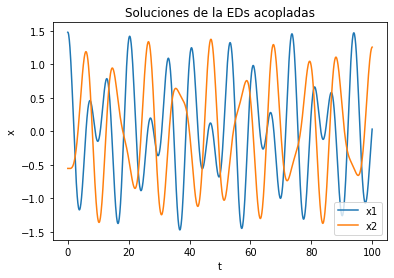

In [95]:
PRO(1,2,1,5,10)


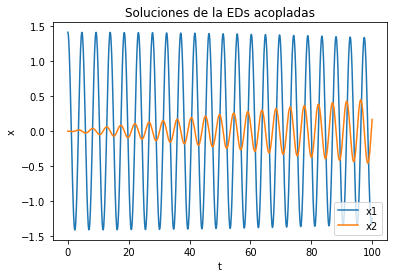

In [123]:
#Particularmente tomemos k1=k3=k y m1=m2 con k2<<k.
k1=k3=100 #N/m
k2=1
m1=m2=30
PRO(k1,k2,k3,m1,m2)

#La oscilación de x1 al inicio es poco perceptible, pero la amplitud aumenta con el tiempo

In [124]:
#Usamos la función de ED acopladas para la animación
def PRO1(k1,k2,k3,m1,m2): #Función que me permite solucionar un sistema de dos ecuaciones diferenciales acopladas
  A = np.matrix([[(k1+k2)/m1, -k2/m1],[-k2/m2,(k2+k3)/m2]]) #Ecuación de fuerzas para el sistema , ignoramos el signo menos para no tener problemas a la hora de calcular los valores propios
  
  autovalores, autovectores = np.linalg.eig(A) #Autovalores y autovectoes
  S = autovectores #Matriz de vectores propios
  omega1=np.sqrt(autovalores[0]) #omega es el valor proprio de la matriz
  omega2=np.sqrt(autovalores[1])

  def func1(U, t,omega1,k1,k2,k3,m1,m2): #1ra ecuación diferencial
    du0dt=U[1]
    du1dt=-U[0]*omega1
    return np.array([du0dt,du1dt])

  def func2(U, t,omega2,k1,k2,k3,m1,m2): #2da ecuación diferencial
    du0dt=U[1]
    du1dt=-U[0]*omega2
    return np.array([du0dt,du1dt])

    
  args1=(omega1,k1,k2,k3,m1,m2) #Argumentos
  U01=np.array([1.0, 0.0]) #Condiciones iniciales
  t=np.linspace(0,100,1000)
  sol=odeint(func1,U01,t,args1) #integrador
  eta1, sigma = sol[:,0], sol[:,1] #Solución

  args2=(omega2,k1,k2,k3,m1,m2)
  U02=np.array([-1.0, 0.0])
  sol2=odeint(func2,U02,t,args2)
  eta2, sigma2 = sol2[:,0], sol2[:,1]



  omega1, omega2, eta1, eta2

  x = np.linalg.solve (S, np.array([eta1, eta2])) #Vector x
  x1, x2 = x[0,:], x[1,:] #Componentes del vector x
  plt.title("Soluciones de la EDs acopladas")
  plt.plot(t,x1,label='x1')
  plt.plot(t,x2,label='x2')
  plt.xlabel("t")
  plt.ylabel("x")
  plt.legend()
  
  return x1, x2

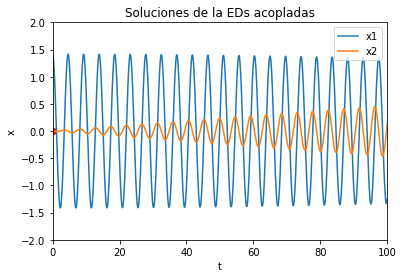

In [138]:

from matplotlib.animation import FuncAnimation
t=np.linspace(0,100,1000)

fig, ax = plt.subplots()
xdata, ydata = x1[0], x2[0]
ln, = plt.plot([0], [0], 'ro')

x1, x2 = PRO1(k1,k2,k3,m1,m2)
def init():
    ax.set_xlim(0, 100)
    ax.set_ylim(-2, 2)
    return ln,

def update(x1,x2):
    xdata.append(x1)
    ydata.append(x2)
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 50, 100), interval=100,
                    init_func=init, blit=True)
plt.show()